In [1]:
import sys
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# run installed version of flopy or add local path
try:
    import flopy
except:
    fpth = os.path.abspath(os.path.join('..', '..'))
    sys.path.append(fpth)
    import flopy

print(sys.version)
print('numpy version: {}'.format(np.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('flopy version: {}'.format(flopy.__version__))

flopy is installed in /Users/jdhughes/Documents/Development/flopy_git/flopy_us/flopy
3.6.7 | packaged by conda-forge | (default, Feb 28 2019, 02:16:08) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version: 1.14.5
matplotlib version: 2.2.2
flopy version: 3.2.11


In [2]:
# creat the model package
m = flopy.modflow.Modflow("drt_test", model_ws="temp", exe_name="mfnwt", version="mfnwt")
d = flopy.modflow.ModflowDis(m, nlay=1, nrow=10, ncol=10, nper=1, perlen=1, top=10, botm=0, steady=True)
b = flopy.modflow.ModflowBas(m, strt=10, ibound=1)
u = flopy.modflow.ModflowUpw(m, hk=10)
n = flopy.modflow.ModflowNwt(m)
o = flopy.modflow.ModflowOc(m)

In [3]:
# create the drt package
spd = []
for i in range(m.nrow):
    spd.append([0, i, m.ncol-1, 5.0, 50.0, 1, 1, 1, 1.0])
d = flopy.modflow.ModflowDrt(m, stress_period_data={0:spd})

In [4]:
# run the drt model
m.write_input()
m.run_model()

FloPy is using the following  executable to run the model: /Users/jdhughes/.local/bin/mfnwt

                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUNDWATER-FLOW MODEL
                             WITH NEWTON FORMULATION
                             Version 1.1.4 4/01/2018                         
                    BASED ON MODFLOW-2005 Version 1.12.0 02/03/2017                       

                    SWR1 Version 1.04.0 09/15/2016                       

 Using NAME file: drt_test.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2019/03/22 14:39:13

 Solving:  Stress period:     1    Time step:     1    Groundwater-Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2019/03/22 14:39:13
 Elapsed run time:  0.005 Seconds

  Normal termination of simulation


(True, [])

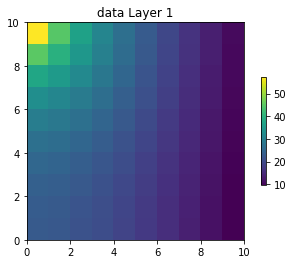

In [5]:
# plot heads for the drt model
hds = flopy.utils.HeadFile(os.path.join(m.model_ws, m.name+".hds"))
hds.plot(colorbar=True)

In [6]:
# remove the drt package and create a standard drain file
spd = []
for i in range(m.nrow):
    spd.append([0, i, m.ncol-1, 5.0, 1.0])
m.remove_package("DRT")
d = flopy.modflow.ModflowDrn(m, stress_period_data={0:spd})

In [7]:
# run the drain model
m.write_input()
m.run_model()

FloPy is using the following  executable to run the model: /Users/jdhughes/.local/bin/mfnwt

                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUNDWATER-FLOW MODEL
                             WITH NEWTON FORMULATION
                             Version 1.1.4 4/01/2018                         
                    BASED ON MODFLOW-2005 Version 1.12.0 02/03/2017                       

                    SWR1 Version 1.04.0 09/15/2016                       

 Using NAME file: drt_test.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2019/03/22 14:39:13

 Solving:  Stress period:     1    Time step:     1    Groundwater-Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2019/03/22 14:39:13
 Elapsed run time:  0.004 Seconds

  Normal termination of simulation


(True, [])

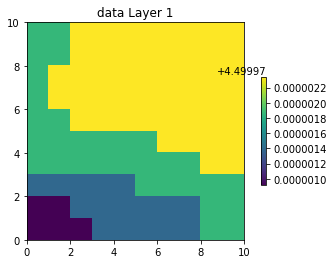

In [8]:
# plot the heads for the model with the drain
hds = flopy.utils.HeadFile(os.path.join(m.model_ws, m.name+".hds"))
hds.plot(colorbar=True)